In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [170]:
import keras 
from keras.models import Sequential
from keras .layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn .metrics import accuracy_score


In [171]:
import ipywidgets as widgets
import io 
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

TRAIN TEST SPLIT

In [172]:
X_train = []
Y_train = []
image_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath=os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
    
    for i in labels:
        folderPath=os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
    
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [173]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3166, 150, 150, 3)

In [174]:


X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)



In [175]:
y_train_new = []
for i in y_train:
        y_train_new.append(labels.index(i))    
        y_train=y_train_new
        y_train= tf.keras.utils.to_categorical(y_train)
    
y_test_new = []
for i in y_test:
        y_test_new.append(labels.index(i))
        y_test=y_test_new
        y_test= tf.keras.utils.to_categorical(y_test)

CONVOLUTION NEURAL NETWORK

In [176]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0,3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(4,activation='softmax'))




In [177]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_55 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_57 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [178]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [179]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
81/81 [==============================] - 7s 41ms/step - loss: 1.4256 - accuracy: 0.4832 - val_loss: 0.9740 - val_accuracy: 0.5474
Epoch 2/20
81/81 [==============================] - 3s 38ms/step - loss: 0.7934 - accuracy: 0.6622 - val_loss: 0.9138 - val_accuracy: 0.6596
Epoch 3/20
81/81 [==============================] - 3s 37ms/step - loss: 0.5803 - accuracy: 0.7668 - val_loss: 0.6012 - val_accuracy: 0.7614
Epoch 4/20
81/81 [==============================] - 3s 38ms/step - loss: 0.4018 - accuracy: 0.8420 - val_loss: 0.4774 - val_accuracy: 0.8175
Epoch 5/20
81/81 [==============================] - 3s 38ms/step - loss: 0.2719 - accuracy: 0.8970 - val_loss: 0.4355 - val_accuracy: 0.8421
Epoch 6/20
81/81 [==============================] - 3s 38ms/step - loss: 0.2350 - accuracy: 0.9115 - val_loss: 0.4129 - val_accuracy: 0.8632
Epoch 7/20
81/81 [==============================] - 3s 38ms/step - loss: 0.1800 - accuracy: 0.9298 - val_loss: 0.3544 - val_accuracy: 0.9053
Epoch 8/20
81

In [180]:
import matplotlib .pyplot as plt
import seaborn as sns

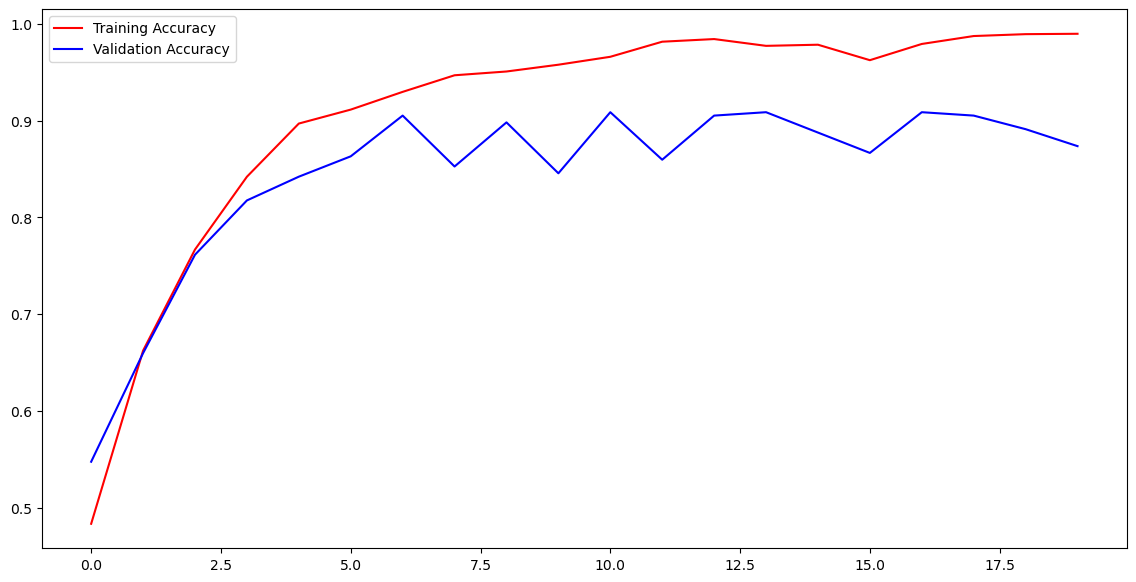

In [181]:
#model.save('braintumor.h5')
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

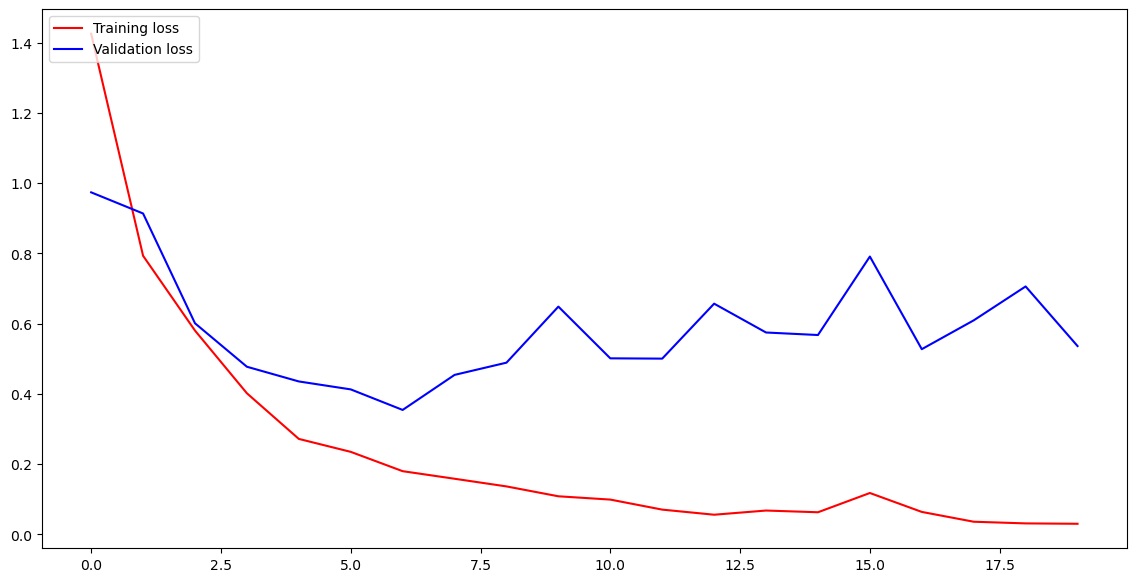

In [182]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [183]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [184]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

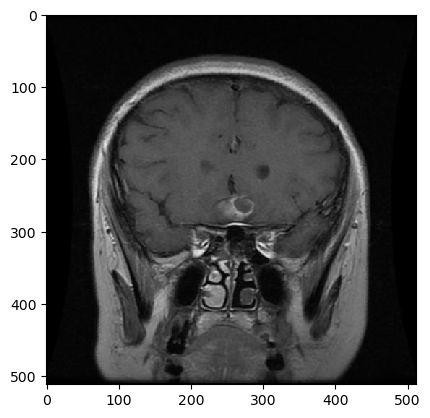

In [185]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [186]:
a=model.predict(img_array)
indices=a.argmax()
indices

1/1 [==============================] - 0s 129ms/step


3

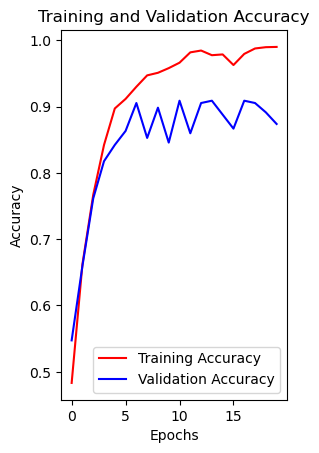

In [187]:
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


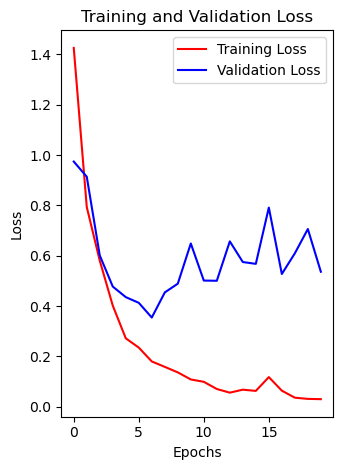

In [188]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plotting additional graphs
# ...

# Example 1: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test data
# Predict classes for the test data
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)


# Create a confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix

# Example 2: ROC Curve
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test data
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Example 3: Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds
precision = dict()
recall = dict()
pr_thresholds = dict()
for i in range(len(labels)):
    precision[i], recall[i], pr_thresholds[i] = precision_recall_curve(y_test[:, i], y_prob[:, i])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(recall[i], precision[i], label=labels[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

# Example 4: Learning Curve
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'm', label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


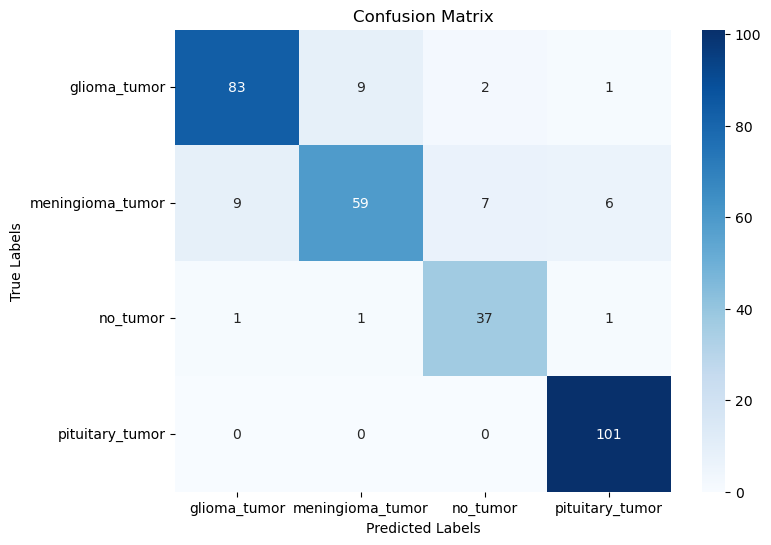

In [192]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

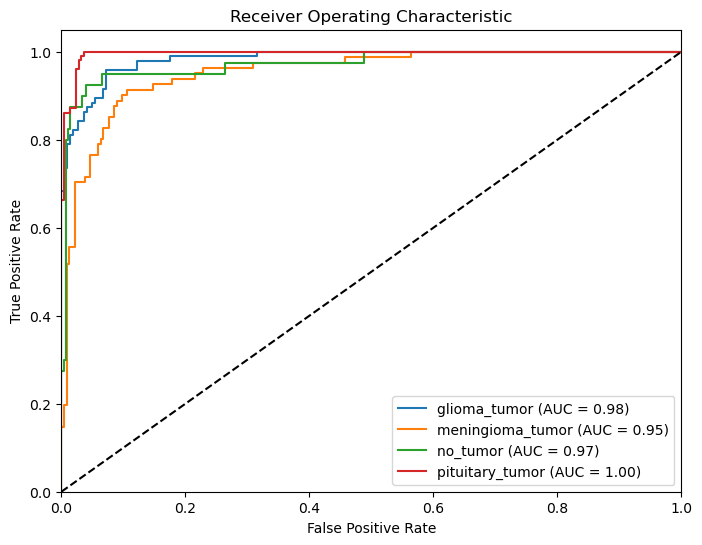

In [194]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [198]:
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds
precision = dict()
recall = dict()
pr_thresholds = dict()
for i in range(len(labels)):
    precision[i], recall[i], pr_thresholds[i] = precision_recall_curve(y_test[:, i], y_prob[:, i])


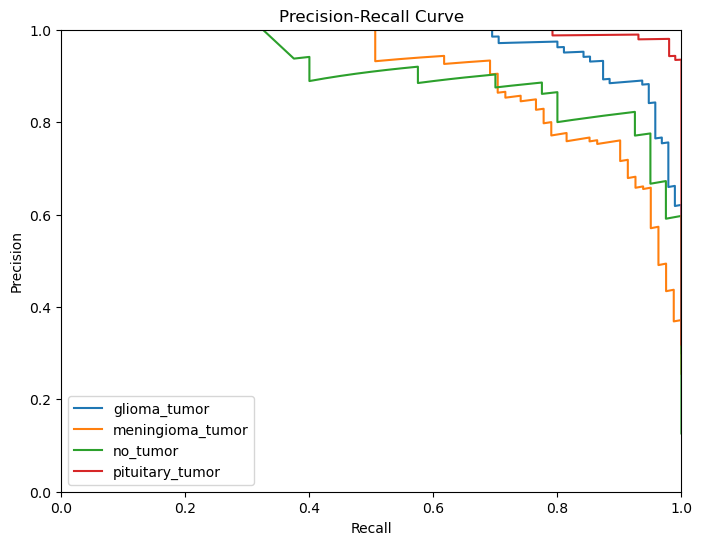

In [200]:
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(recall[i], precision[i], label=labels[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [202]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)


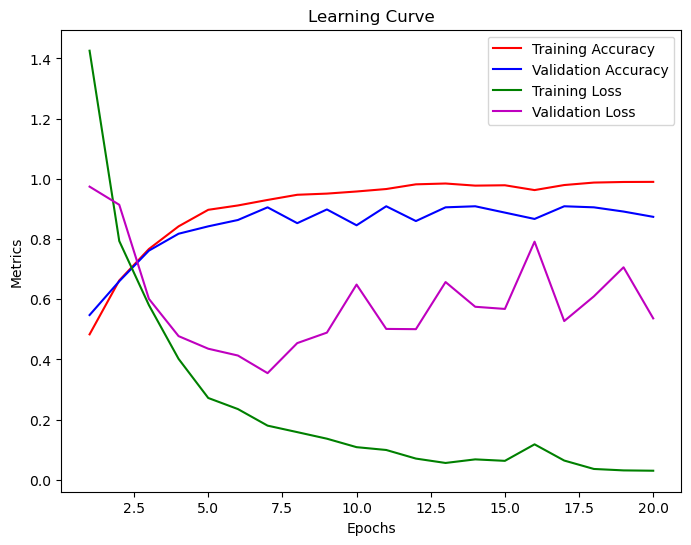

In [204]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'm', label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()